## Rayleigh fading channel

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

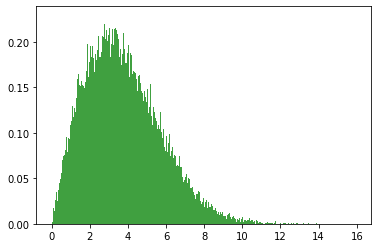

In [22]:
no_examples = 100000
i = 0
results = []

while i < no_examples:
    x = np.random.rayleigh(3, None)
    #print(x)
    results.append(x)
    i += 1

#print(results)
plt.hist(results, 1000, density=True, facecolor='g', alpha=0.75)
#plt.xlim(0,4)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


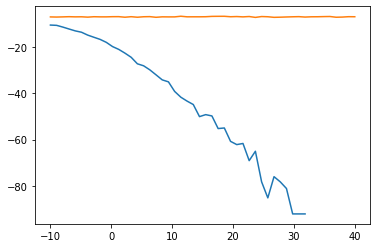

In [65]:
# simulation parameters
transmission_count = 10000
simulation_point_count = 50

SNR_dB_list = np.linspace(-10,40,simulation_point_count)
sigma_fading = 1

# array initialization for results
BER_non_coherent_list = np.zeros(simulation_point_count)
BER_coherent_list = np.zeros(simulation_point_count)

# iterate through the different SNR simulation points
i = 0
while i < simulation_point_count:

    SNR = 10**(SNR_dB_list[i]/10)
    sigma_noise = 1/np.sqrt(SNR)
    
    # loop for simulating many transmissions
    ii = 0
    Error_non_coherent = 0
    Error_coherent = 0
    while ii < transmission_count:
        x = np.random.randint(0,2)*2 - 1 # choosing a BPSK transmit symbol randomly
        h = np.random.normal(0, sigma_fading) + 1j*np.random.normal(0, sigma_fading) # Rayleigh fading
        n = np.random.normal(0, sigma_noise) + 1j*np.random.normal(0, sigma_noise) # AWGN
        y = h*x + n # calculation of receive symbol
        ii += 1

        # non coherent estimator (no channel information at the receiver)
        if y.real <= 0:
            y_non_coherent = -1
        else:
            y_non_coherent = 1
        if y_non_coherent != x:
            Error_non_coherent +=1

        # coherent estimator (full channel information at the receiver)
        y_coherent = y/h
        if y_coherent.real <= 0:
            y_coherent = -1
        else:
            y_coherent = 1
        if y_coherent != x:
            Error_coherent += 1

    # calculation of the bit error rates
    BER_non_coherent_BPSK = Error_non_coherent/transmission_count
    BER_coherent_BPSK = Error_coherent/transmission_count

    # saveing the bit error rates
    BER_non_coherent_list[i] = BER_non_coherent_BPSK
    BER_coherent_list[i] = BER_coherent_BPSK
    
    i += 1

# plotting the results
plt.plot(SNR_dB_list, 10*np.log(BER_coherent_list))
plt.plot(SNR_dB_list, 10*np.log(BER_non_coherent_list))